## California Housing Prices Prediction with Machine Learning.

Machine learning algorithms are used for various tasks. In this notebook, we'll explore some machine learning algorithms to predict California house prices based on historical data. 

The data is taken from Kaggle in this url. 
https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Import necessary libraries.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
    
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV



### Load the data and check the rows and columns.

In [2]:
#  Read in the data.


data = pd.read_csv('housing.csv')

In [3]:
# View the first five rows of the data.
# Look at the data in the cells to note the categorical and numerical variables.

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Check the general information about the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Get a deaper understanding of the data to see the mean values, min and max.
# We'll also compare the result of our model score to the standard deviation.

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Check the row and column length.

data.shape

(20640, 10)

In [7]:
# List out the column names.

data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.dropna(inplace=True)

In [10]:
# Split the data into train and test sets before feature engineering to prevent data leakage.

data_train, data_test = train_test_split(data,test_size = 0.2, random_state= 42)

In [11]:
# Check the shape of the train data.

data_train.shape

(16346, 10)

### Feature Engineering.

We'll look at our data and process the features depending on the data types before passing it to our algorithms.

# Numerical features

In [12]:
# We are checking through the features in the train data to separate numerical features from categorical features.
# Features(columns) with int and float datatypes are regarded as numerical features while
# those that are objects are regarded as categorical features.

numerical_features = [feature for feature in data_train.columns if data_train[feature].dtypes != 'O']

print('Number of numerical columns: ', len(numerical_features))

data_train[numerical_features].head()

Number of numerical columns:  9


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0


In [13]:
# Discrete features are numerical features that are definite and can be counted or are unique.

discrete_feature=[feature for feature in numerical_features if len(data_train[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


### Visualize the train data.

We'll check the general trend in the train data with matplotlib and seaborn.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

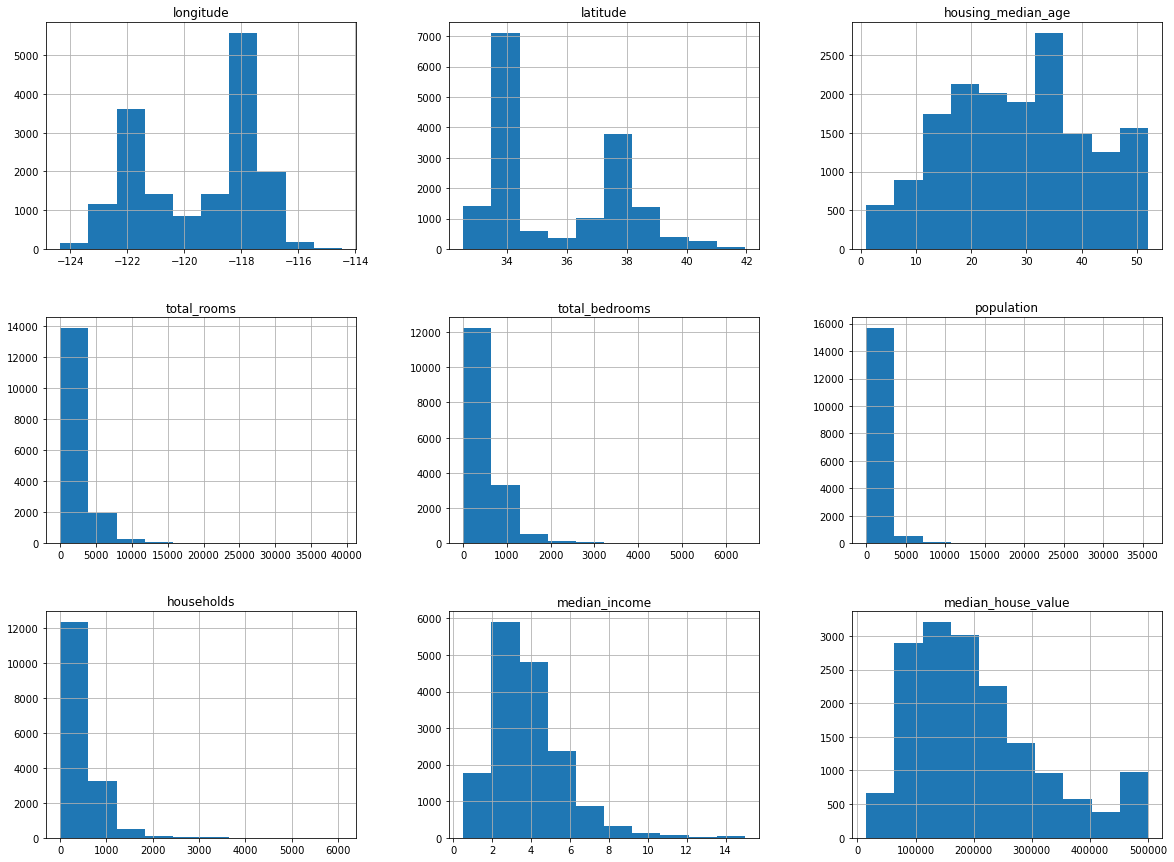

In [78]:

plt.rcParams['figure.figsize'] = (20,15)
# plt.grid(b=None)
data_train.hist()

In [16]:
# Separating the features and the target labels.

x_train = data_train.drop(['median_house_value'], axis=1)
y_train = data_train['median_house_value']

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

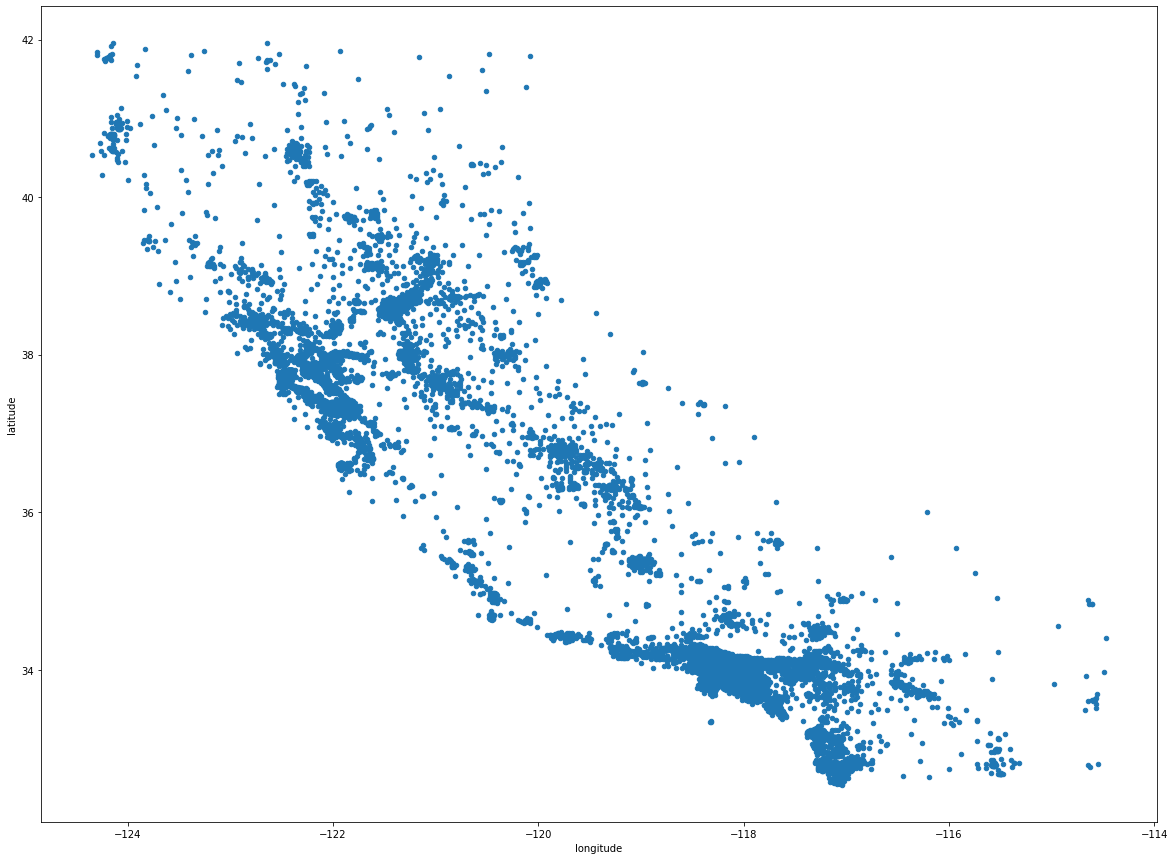

In [17]:
# Visualizing the density of the data with scatter plot.

x_train.plot(kind='scatter',x='longitude',y='latitude')

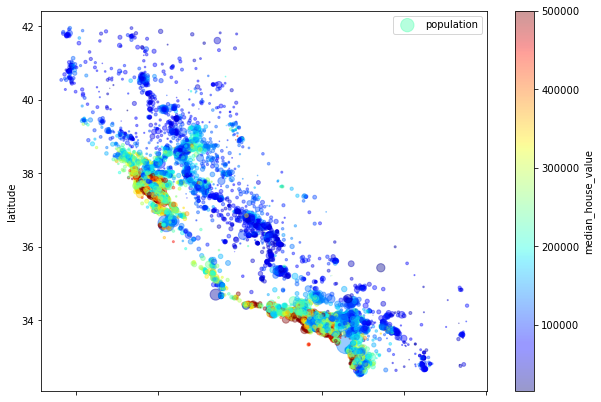

In [18]:
data_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data_train["population"]/100, 
             label="population", figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

<Figure size 1800x1080 with 0 Axes>

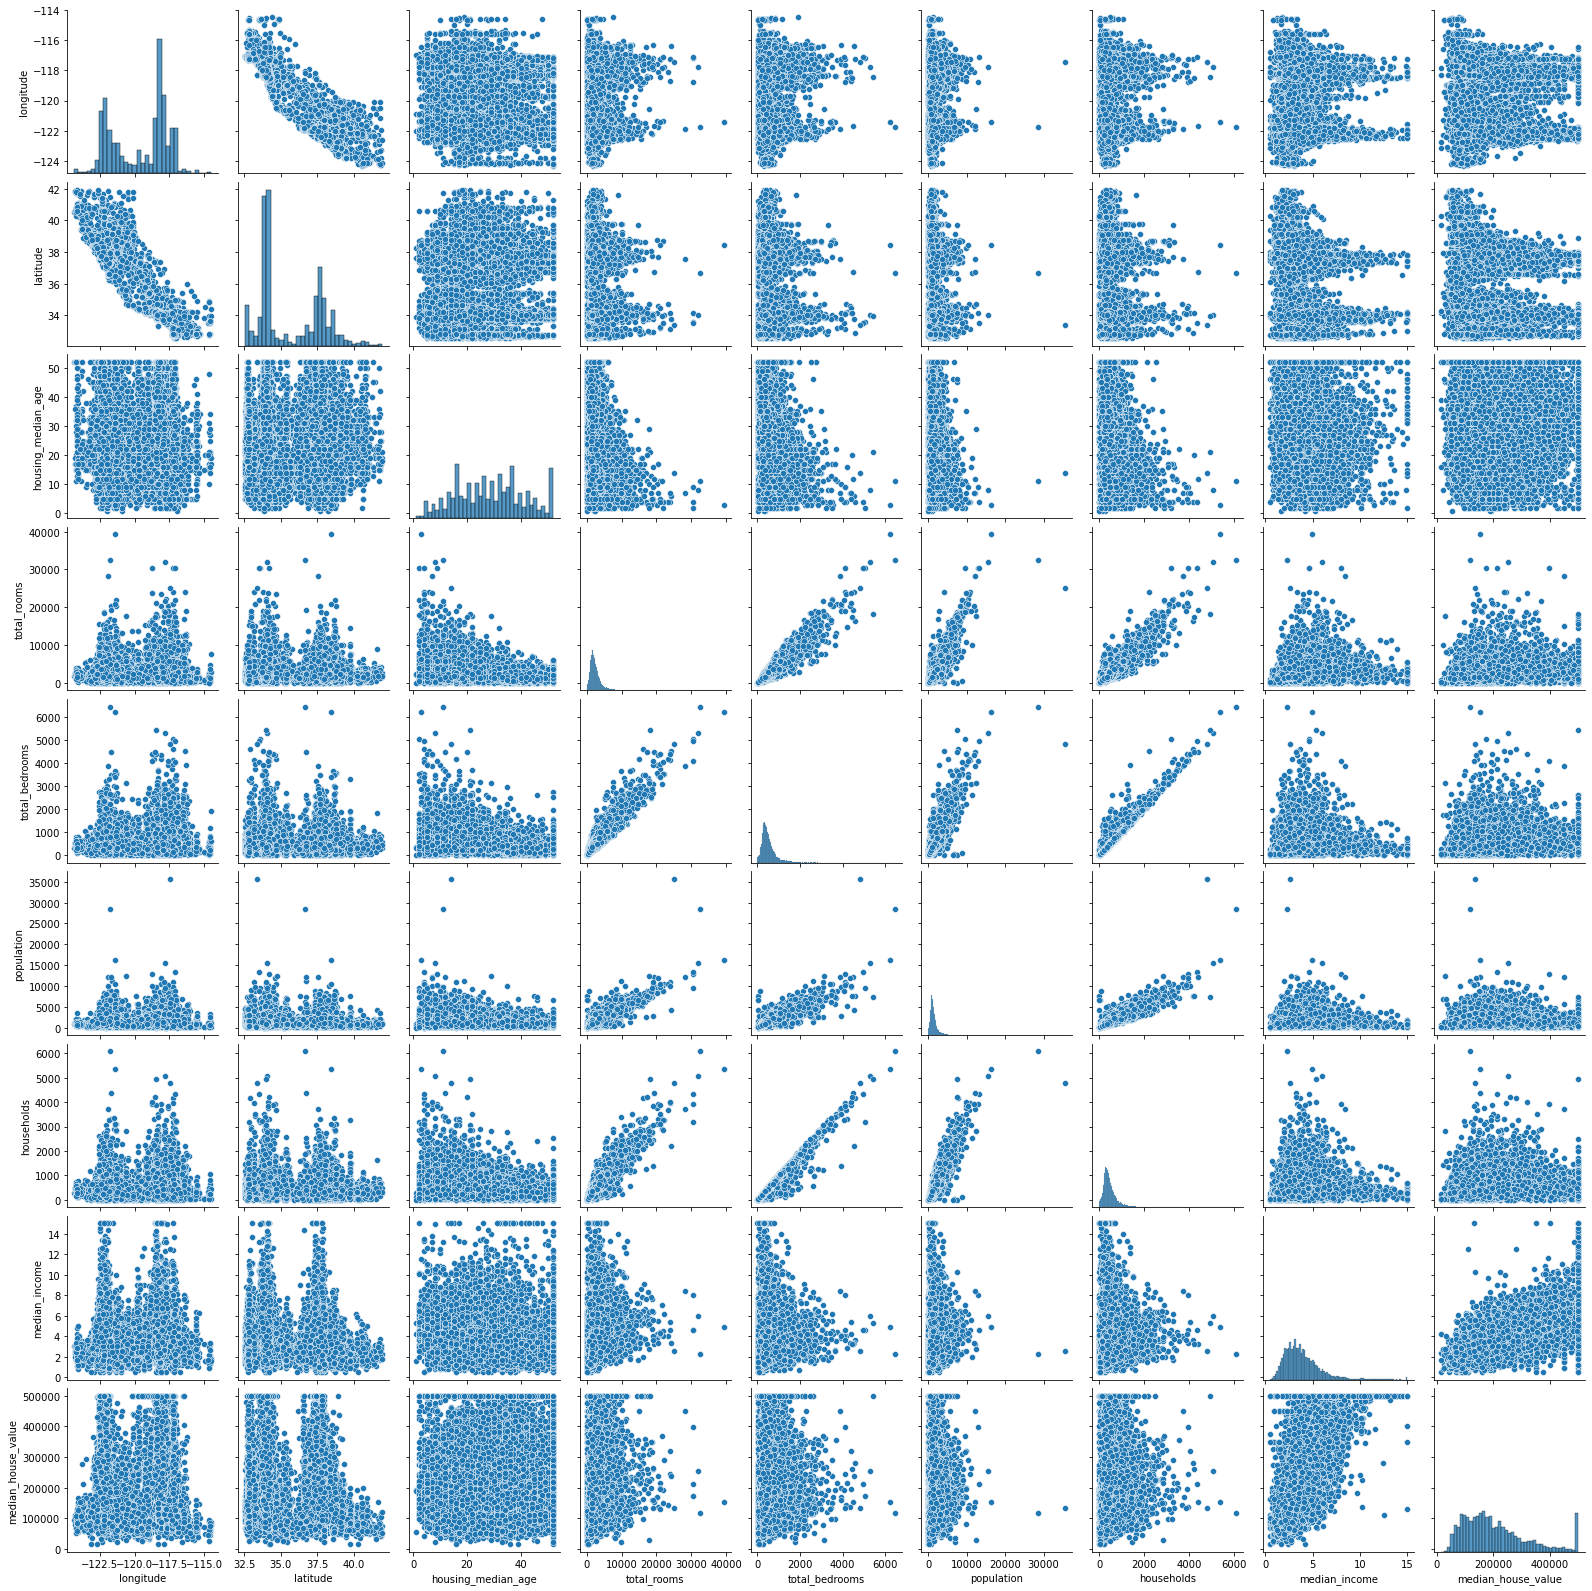

In [19]:
# Visualizing the likely relationship between all features of the train data with seaborn pairplot. 

plt.figure(figsize=(25,15))
sns.pairplot(data_train)
plt.show()

#### Plotting the correlation between the features and the target variable.

We notice that the median income has the highest positive correlation with median house value.

<AxesSubplot:>

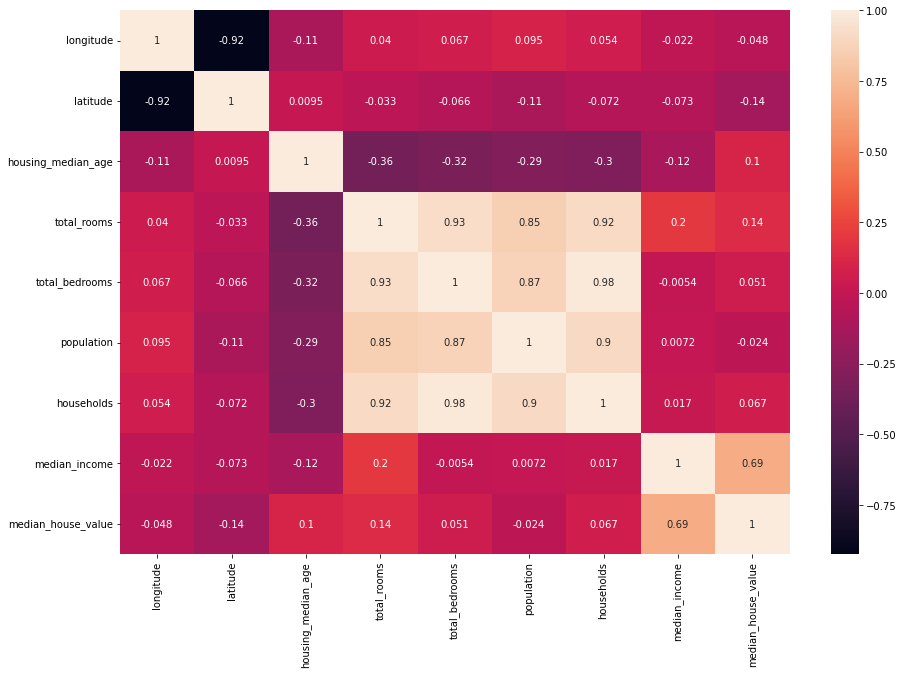

In [20]:
# PLotting the correlation between the features and the target variable


corr = data_train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True)

In [21]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688695
total_rooms           0.136040
housing_median_age    0.104041
households            0.066598
total_bedrooms        0.051352
population           -0.023989
longitude            -0.048166
latitude             -0.141933
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

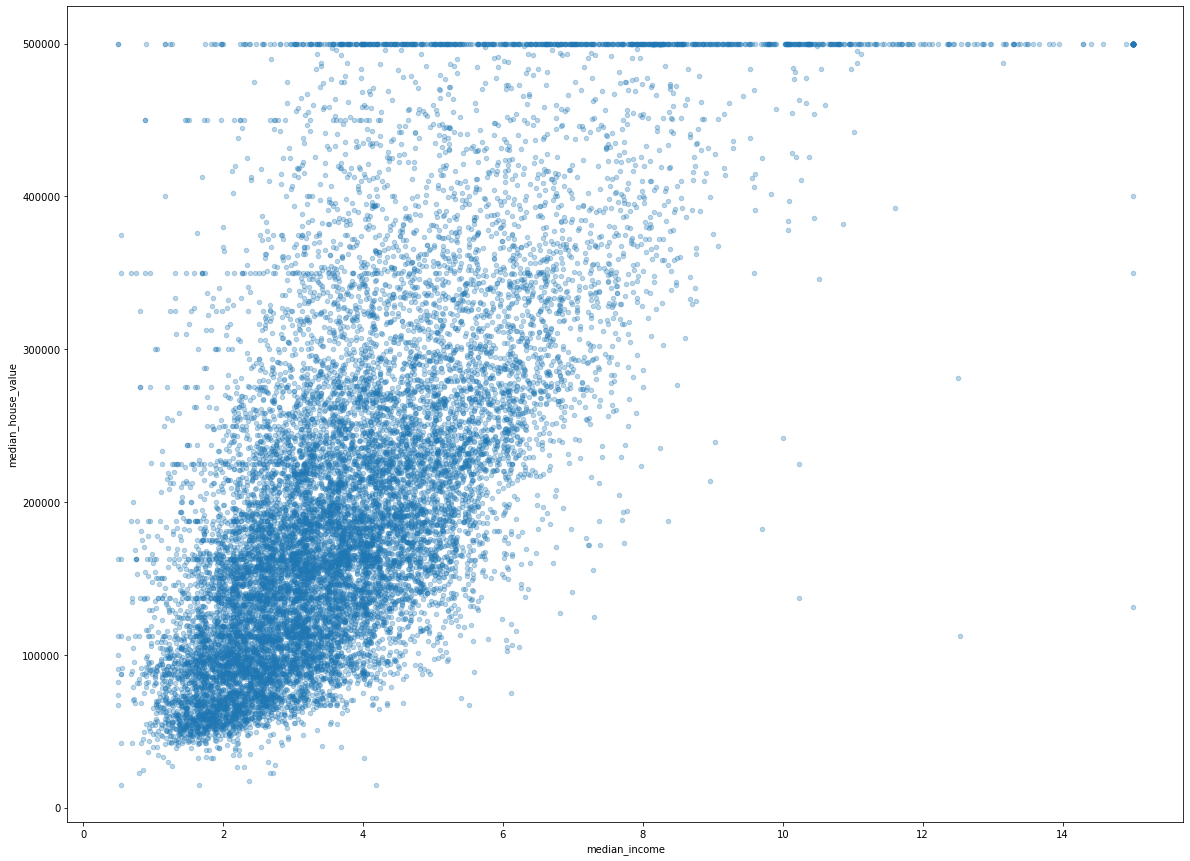

In [22]:
# Plotting the median income against median house value shows a positive linear correlation.

data_train.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.3)

<AxesSubplot:>

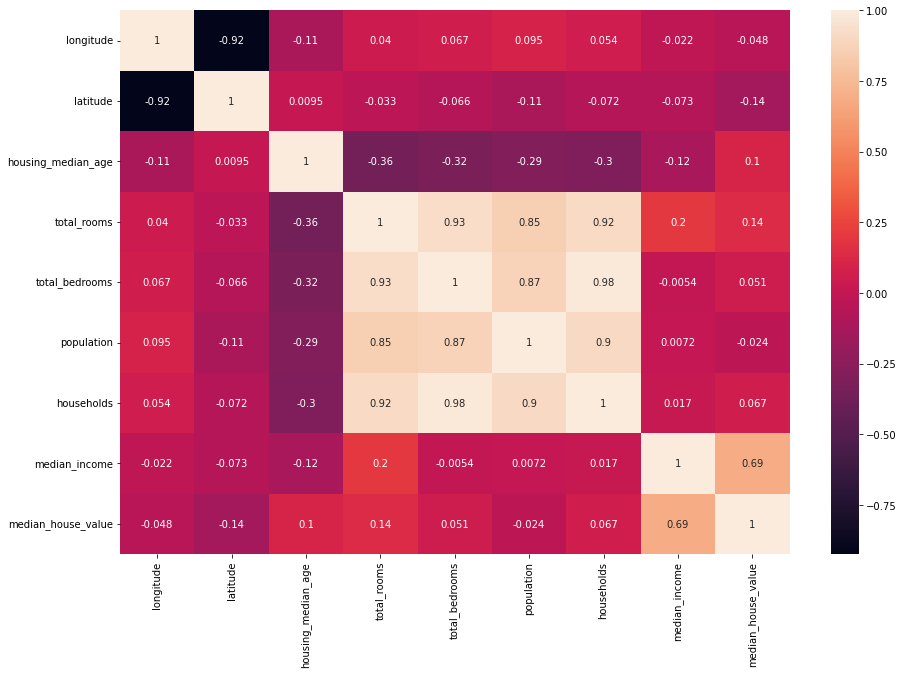

In [24]:
corr = data_train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True)

In [25]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688695
total_rooms           0.136040
housing_median_age    0.104041
households            0.066598
total_bedrooms        0.051352
population           -0.023989
longitude            -0.048166
latitude             -0.141933
Name: median_house_value, dtype: float64

In [26]:
data_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [27]:
data_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Preprocessing the categorical feature.

Categorical features require a different preprocessing because they are neither integers nor float. We need to convert them into numerical form. Since these values in the dataset are limited, we can use one-hot encoding.

In [28]:
# Checking the categorical feature.

data_train_cat = data_train[['ocean_proximity']]

In [29]:
data_train['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [30]:
data_train['ocean_proximity'].value_counts()

<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: ocean_proximity, dtype: int64

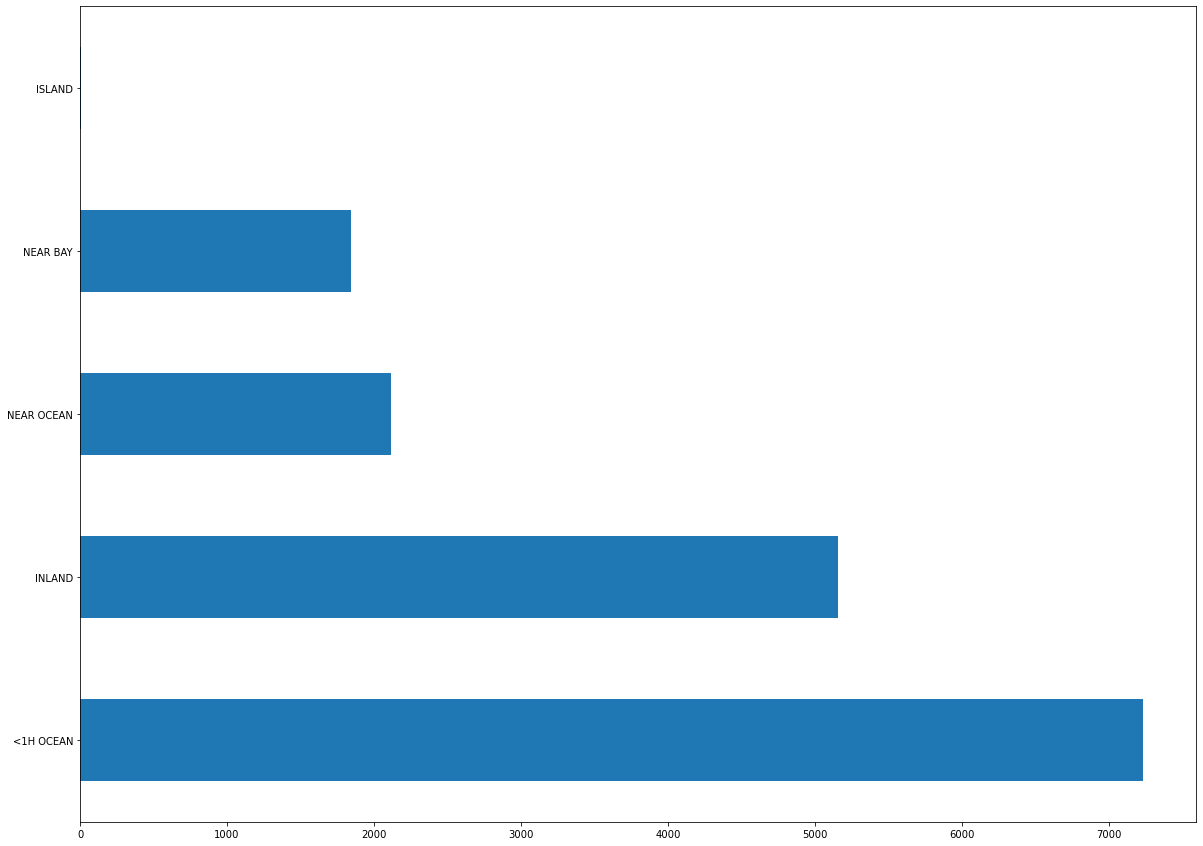

In [31]:
data_train['ocean_proximity'].value_counts().sort_values(ascending=False).plot.barh();

In [32]:
# Encoding with pandas getdummies.

encoded_cat = pd.get_dummies(data_train_cat)

In [33]:
encoded_cat

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,1,0,0,0,0
2057,0,1,0,0,0
6453,0,1,0,0,0
4619,1,0,0,0,0
15266,0,0,0,0,1
...,...,...,...,...,...
11397,1,0,0,0,0
12081,1,0,0,0,0
5447,1,0,0,0,0
866,0,0,0,1,0


In [34]:
#  Joining the encoded categorical data back to the train data.

x_train = pd.concat([data_train,encoded_cat], axis='columns')

In [35]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,<1H OCEAN,1,0,0,0,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,INLAND,0,1,0,0,0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,INLAND,0,1,0,0,0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,<1H OCEAN,1,0,0,0,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,NEAR OCEAN,0,0,0,0,1


In [36]:
#  Drop the ocean_proximity column.

x_train.drop(['ocean_proximity'], axis=1, inplace=True)
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,INLAND
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,<1H OCEAN
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,NEAR OCEAN


In [37]:
x_train.shape

(16346, 14)

### Scaling the train data.

Scaling our data helps the algorithm to perform better in predicting the housing values.

In [38]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train[0:5]

array([[-1.10651441,  0.78620804, -1.16206244,  0.82931106,  0.92929666,
         1.13110981,  1.04074393,  0.43841173,  0.18214083,  1.1227399 ,
        -0.67879934, -0.01354861, -0.35636982, -0.38540693],
       [-0.02467137,  0.46787317,  0.34865716, -0.73855806, -0.85052345,
        -0.7088994 , -0.85615229, -0.24238852, -0.83653223, -0.89067824,
         1.47318941, -0.01354861, -0.35636982, -0.38540693],
       [ 0.75804456, -0.71183841, -0.2874353 ,  0.58735021,  0.74724238,
         0.37845927,  0.69152454, -0.10896853,  0.3603217 , -0.89067824,
         1.47318941, -0.01354861, -0.35636982, -0.38540693],
       [ 0.63340827, -0.73524539, -0.04890063, -0.12274217,  0.98918293,
         1.18512356,  1.04868073, -0.86116849,  0.8600973 ,  1.1227399 ,
        -0.67879934, -0.01354861, -0.35636982, -0.38540693],
       [ 1.15189525, -1.21742909, -0.12841219, -0.36563185, -0.34508329,
        -0.10500803, -0.24766396, -0.16898645,  0.06914808, -0.89067824,
        -0.67879934, -0.01

### Building the models.

We are going to use 3 different algorithms and choose te one with the least error.

In [39]:
# Function to help us display the scores for each algorithm

def display_scores(scores):
      scores = np.sqrt(-scores)
      print(f"""
      RMSE Scores : {scores}
      Mean : {scores.mean()}
      Standard Deviation : {scores.std()}
      """)

### Initializing the 3 algorithms. 

We will use linear regression, decision tree regressor and random forest.

In [40]:
L_Reg = LinearRegression()
D_Tree = DecisionTreeRegressor()
R_Forest = RandomForestRegressor()


The cross_val_score() function simply computes the  R2  for each fold of the cross validation, in case of regression models. 

In [41]:
L_Reg_scores = cross_val_score(L_Reg,
                               x_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)




In [42]:
D_Tree_scores = cross_val_score(D_Tree,
                               x_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [43]:
R_Forest_scores = cross_val_score(R_Forest,
                               x_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

We'll use our helper function above to display the scores of each algorithm.

In [45]:
display_scores(L_Reg_scores)


      RMSE Scores : [3.58156233e-10 1.05425437e-10 1.05950544e-10 5.10042523e-10
 1.56733468e-10 3.90272946e-10 5.71833765e-10 1.89674328e-10
 3.39877493e-10 1.16757133e-10]
      Mean : 2.844723870738545e-10
      Standard Deviation : 1.6447231054075416e-10
      


In [46]:
display_scores(D_Tree_scores)


      RMSE Scores : [ 95.84646234 101.26116354  90.90102828  89.10015668 146.88405005
  84.15799907 152.73916775  90.79413005 112.33583153 109.41034793]
      Mean : 107.34303372198073
      Standard Deviation : 22.884967170908396
      


In [47]:
display_scores(R_Forest_scores)


      RMSE Scores : [ 53.11713903  44.11881379  52.85125397  48.75529611 127.32376717
  44.89480739  59.11723618  48.44016953  93.26608415  95.8725263 ]
      Mean : 66.7757093613699
      Standard Deviation : 27.03066283224636
      


## Linear regression has the smallest error and standard deviation

## Using random forest

However, we'll try to improve the random forest algorithm with GRIDCV.

In [51]:
params = {'n_estimators': [3, 10, 20, 50], 
          'max_features': [2, 3, 4, 10]}

In [52]:
grid_cv = GridSearchCV(R_Forest, params, 
                     cv=5,
                     scoring='neg_mean_squared_error')

In [53]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4, 10],
                         'n_estimators': [3, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [54]:
grid_cv.best_params_

{'max_features': 10, 'n_estimators': 50}

In [55]:
for mean_score,params in zip((grid_cv.cv_results_['mean_test_score']),
                             (grid_cv.cv_results_['params'])):
    print(np.sqrt(-mean_score),'    ',params);

27416.76523079012      {'max_features': 2, 'n_estimators': 3}
21923.495906260214      {'max_features': 2, 'n_estimators': 10}
18622.77546250218      {'max_features': 2, 'n_estimators': 20}
17301.548278859995      {'max_features': 2, 'n_estimators': 50}
20687.396760648648      {'max_features': 3, 'n_estimators': 3}
14584.090347038937      {'max_features': 3, 'n_estimators': 10}
12452.52031660466      {'max_features': 3, 'n_estimators': 20}
11055.187677353793      {'max_features': 3, 'n_estimators': 50}
14869.97035611293      {'max_features': 4, 'n_estimators': 3}
8979.615620382112      {'max_features': 4, 'n_estimators': 10}
8175.440550317713      {'max_features': 4, 'n_estimators': 20}
7005.801777975174      {'max_features': 4, 'n_estimators': 50}
1842.9642867569207      {'max_features': 10, 'n_estimators': 3}
1111.180201127599      {'max_features': 10, 'n_estimators': 10}
754.8457739381726      {'max_features': 10, 'n_estimators': 20}
643.2794746021597      {'max_features': 10, 'n_est

In [56]:
data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0,NEAR OCEAN
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0,INLAND
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0,<1H OCEAN
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0,NEAR BAY
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0,INLAND


In [57]:
x_test = data_test.drop(['median_house_value'], axis=1)
y_test = data_test['median_house_value']

In [58]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND


## Preprocessing test data

We'll preprocess our test data as we did for the train data and run predictions on the test data.

In [59]:
numerical_features_test = [feature for feature in data_test.columns if data_test[feature].dtypes != 'O']

print('Number of numerical columns: ', len(numerical_features_test))

data_test[numerical_features_test].head()

Number of numerical columns:  9


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0


In [60]:
data_test_cat = data_test[['ocean_proximity']]

encoded_cat_test = pd.get_dummies(data_test_cat)
x_test = pd.concat([data_test,encoded_cat_test], axis='columns')

In [61]:
x_test.drop(['ocean_proximity'], axis=1, inplace=True)
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0,0,0,0,0,1
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0,0,1,0,0,0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0,1,0,0,0,0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0,0,0,0,1,0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0,0,1,0,0,0


In [62]:
x_test.shape

(4087, 14)

In [63]:
x_test = scaler.transform(x_test)
x_train[0:5]

array([[-1.10651441,  0.78620804, -1.16206244,  0.82931106,  0.92929666,
         1.13110981,  1.04074393,  0.43841173,  0.18214083,  1.1227399 ,
        -0.67879934, -0.01354861, -0.35636982, -0.38540693],
       [-0.02467137,  0.46787317,  0.34865716, -0.73855806, -0.85052345,
        -0.7088994 , -0.85615229, -0.24238852, -0.83653223, -0.89067824,
         1.47318941, -0.01354861, -0.35636982, -0.38540693],
       [ 0.75804456, -0.71183841, -0.2874353 ,  0.58735021,  0.74724238,
         0.37845927,  0.69152454, -0.10896853,  0.3603217 , -0.89067824,
         1.47318941, -0.01354861, -0.35636982, -0.38540693],
       [ 0.63340827, -0.73524539, -0.04890063, -0.12274217,  0.98918293,
         1.18512356,  1.04868073, -0.86116849,  0.8600973 ,  1.1227399 ,
        -0.67879934, -0.01354861, -0.35636982, -0.38540693],
       [ 1.15189525, -1.21742909, -0.12841219, -0.36563185, -0.34508329,
        -0.10500803, -0.24766396, -0.16898645,  0.06914808, -0.89067824,
        -0.67879934, -0.01

In [64]:
predictions = grid_cv.best_estimator_.predict(x_test)

In [65]:
y_test[0:10].values

array([245800., 137900., 218200., 220800., 170500.,  75000., 269400.,
       228900., 500001.,  80800.])

In [66]:
comparison = pd.DataFrame({'Y Test': y_test[0:10].values,
                          'Predictions' : predictions[0:10]})
comparison

,Y Test,Predictions
0,245800.0,245834.0
1,137900.0,137974.0
2,218200.0,218216.0
3,220800.0,220452.0
4,170500.0,170670.0
5,75000.0,75020.0
6,269400.0,269468.0
7,228900.0,228774.0
8,500001.0,500001.0
9,80800.0,80770.0


In [67]:
def regression_eval(preds):
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test,preds)
    mae = mean_absolute_error(y_test,preds)
    
    print(f"Mean Absolute Error: {mae} \nMean Squared Error:{mse} \nRoot Mean Squared Error:{rmse} \nR Squared Value:{r_squared}")

In [68]:
regression_eval(predictions)

Mean Absolute Error: 242.87295326645474 
Mean Squared Error:385116.2974408616 
Root Mean Squared Error:620.5773903719515 
R Squared Value:0.9999718383030202


### Conclusion.

The mean absolute error is 243 which is way less than the standard error 115395. It also achieved 99.99% r2 score with cross validation. Our model seem pretty good enough.